In [1]:
# Import packages.
using Turing
using StatsPlots

In [2]:
# Declare Functions 
√(x) = sqrt(x)
𝑵(m,sd) = Normal(m, sd)

𝑵 (generic function with 1 method)

In [3]:
# Define a simple Normal model with unknown mean and variance.
@model function gdemo(x, y)
    σ² ~ InverseGamma(2, 3)
    m ~ 𝑵(0, √(σ²))
    x ~ 𝑵(m, √(σ²))
    y ~ 𝑵(m, √(σ²))
end

gdemo (generic function with 2 methods)

In [4]:
#  Run sampler, collect results.
c3 = sample(gdemo(1.5, 2), HMC(0.1, 5), 1000)

Chains MCMC chain (1000×12×1 Array{Float64, 3}):

Iterations        = 1:1:1000
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 3.46 seconds
Compute duration  = 3.46 seconds
parameters        = σ², m
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

          σ²    2.5347    2.8292    0.3760    68.8975   118.4036    1.0030     ⋯
           m    1.5117    1.1642    0.1749    61.3570    46.2585    1.0008     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          σ²    0.5993    1.0723    1.6538    2.6994  

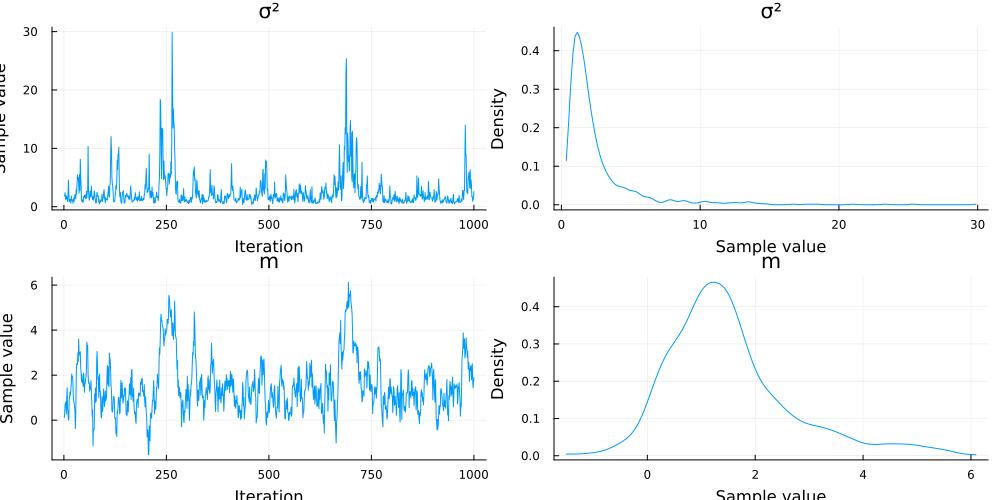

In [5]:
# Summarise results
describe(c3)

# Plot results
plot(c3)
# savefig("images/gdemo-plot.png")

In [11]:
using PrettyTables, DataFrames

In [12]:
formatters = (v,i,j) -> (j > 1) ? round(v, digits=3) : v

function prettystats(chains)
  chains |>
    x -> summarystats(x) |>
    x -> DataFrame(x) |>
    x -> pretty_table(x, backend = :html, formatters = formatters)
end

prettystats (generic function with 1 method)

In [13]:
prettystats(c3)

parameters,mean,std,mcse,ess_bulk,ess_tail,rhat,ess_per_sec
Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Float64
σ²,2.535,2.829,0.376,68.897,118.404,1.003,19.913
m,1.512,1.164,0.175,61.357,46.258,1.001,17.733


# References
- [ ] [Turing.jl Guide](https://turing.ml/v0.21/docs/using-turing/guide)
- [ ] [Inverse-gamma distribution](https://en.wikipedia.org/wiki/Inverse-gamma_distribution)